# PyGeM

## Tutorial 5: Deformation of an object stored into file

In the present tutorial, we are going to show the fundamental steps to compute in order to deform a given object stored in a given file.

To achieve this, we basically need a parser for extracting from the file all geometrical information (typically the nodes coordinates and the topology), then deforming such nodes with one of the **PyGeM** deformation techniques.
Here we show a simple `FFD` applied to a `.vtp` and to an `.stl` files. To deal with such files, we employ the [Smithers](https://github.com/mathLab/Smithers) package, a utilities toolbox that allows for an easy manipulation of several file formats.

As usually, at the beginning we import all the modules we need.

In [1]:
%matplotlib inline
import numpy as np

from pygem import FFD
from smithers import io

For visualization purpose, we also implement a small function that shows the object parsed with **Smithers**.

In [2]:
def plot(data, color=None):

    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    import matplotlib.pyplot as plt

    if color is None:
        color = (0, 0, 1, 0.1)
    fig = plt.figure(figsize=(16,10))

    verts = [data['points'][cell] for cell in data['cells']]
    ax = fig.add_subplot(111, projection='3d')
    faces = Poly3DCollection(verts, linewidths=1, edgecolors='k')
    faces.set_facecolor(color)
    
    ax.add_collection3d(faces)
    ax.set_xlim3d(-.8, .8)
    ax.set_ylim3d(-.8, .8)
    ax.set_zlim3d(-.8, .8)
    ax.set_aspect('equal','box')

    plt.show()

### Deformation of the VTP file

First of all, we need a `.vtp` file: we download a simple cube and we open it.

--2021-07-02 15:42:19--  https://raw.githubusercontent.com/mathLab/Smithers/master/tests/test_datasets/cube.vtp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2498 (2.4K) [text/plain]
Saving to: ‘cube.vtp’

100%[======================================>] 2,498       --.-K/s   in 0s      

2021-07-02 15:42:19 (66.5 MB/s) - ‘cube.vtp’ saved [2498/2498]



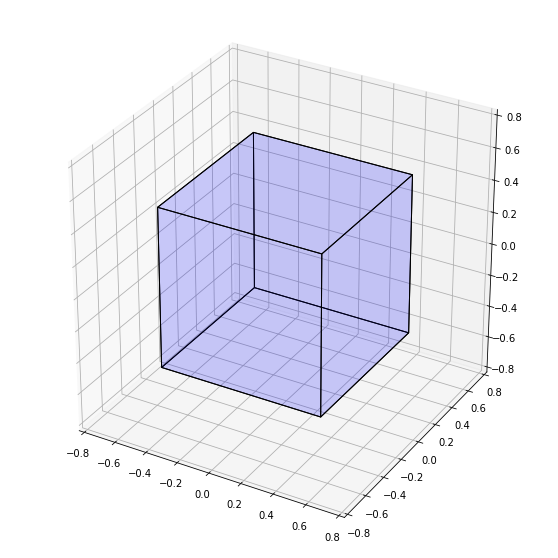

In [3]:
!rm -rf cube.vtp
!wget https://raw.githubusercontent.com/mathLab/Smithers/master/tests/test_datasets/cube.vtp
vtp_filename = "cube.vtp"

vtp_content = io.VTPHandler.read(vtp_filename)
plot(vtp_content)

We can now instantiate a new `FFD` object, setting position and lenght of the lattice of points as well as their displacements. We present here a very simple deformation, moving just one control points, but of course it is possible to change the `FFD` settings according to needed. We also remark that of course any other deformation (by **PyGeM**) can be used!

In [4]:
ffd = FFD()
ffd.origin_box = np.array([-.6, -.6, -.6])
ffd.box_length = np.array([1.2, 1.2, 1.2])

ffd.array_mu_x[1, 1, 1] += 1.5

Now the actual deformation: the points of our object are morphed through the `ffd` and the new coordinates are replaced to the older one.

In [5]:
vtp_content['points'] = ffd(vtp_content['points'])

Here a visual test to see the final outcome!

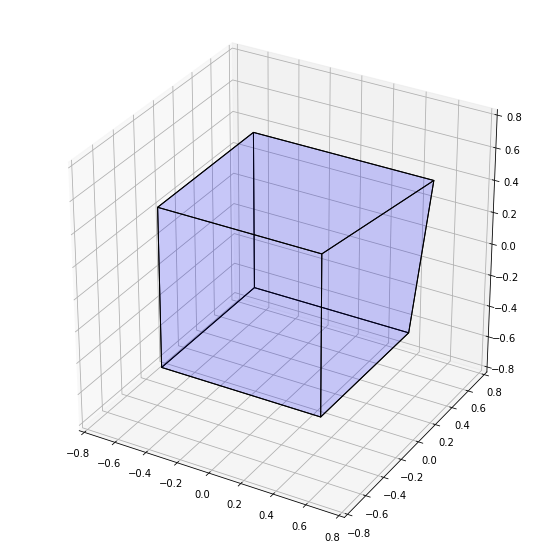

In [6]:
plot(vtp_content)

Of course, the deformed object is still contained within the `vtp_content` dictionary. To save it into a new file, we just need to use again the `VTPHandler` by **Smithers**.

In [7]:
io.VTPHandler.write('deform_cube.vtp', vtp_content)

Pretty easy, isn't?

### Deformation of an STL file
Here we basically replicate (in a more compress way) the previous steps in order to deform an object stored in an STL file. As before, we deal with a simple cube.

In [8]:
!rm -rf cube.stl
!wget https://raw.githubusercontent.com/mathLab/Smithers/master/tests/test_datasets/cube.stl
stl_filename = "cube.stl"

stl_content = io.STLHandler.read(stl_filename)
stl_content['points'] = ffd(stl_content['points'])
io.STLHandler.write('deform_cube.stl', stl_content)

--2021-07-02 15:42:20--  https://raw.githubusercontent.com/mathLab/Smithers/master/tests/test_datasets/cube.stl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1509 (1.5K) [text/plain]
Saving to: ‘cube.stl’

100%[======================================>] 1,509       --.-K/s   in 0s      

2021-07-02 15:42:20 (32.4 MB/s) - ‘cube.stl’ saved [1509/1509]



We can now plot the content of the original file and the deformed one, showing the altered geometry.

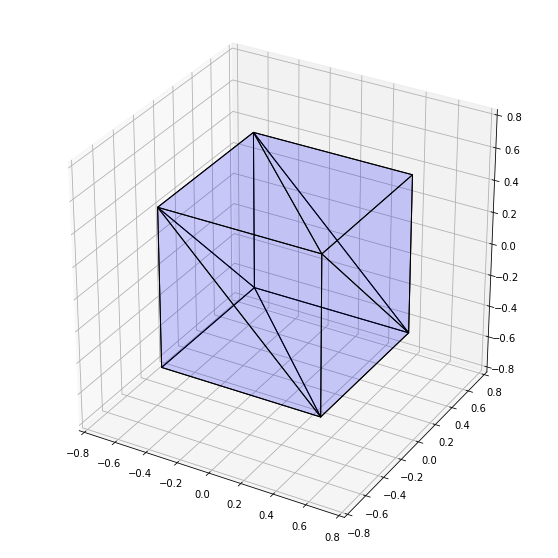

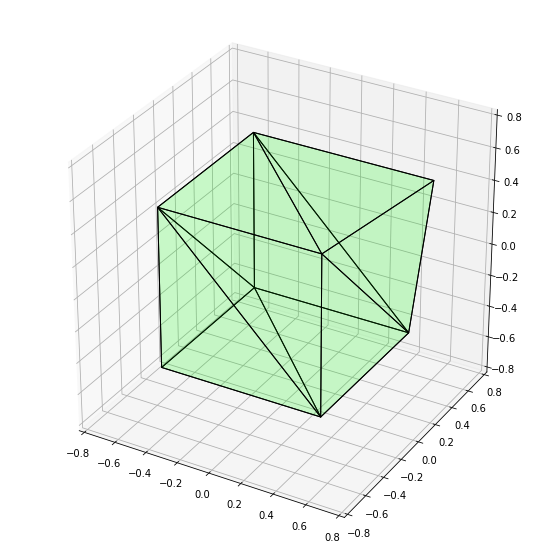

In [9]:
plot(io.STLHandler.read('cube.stl'))
plot(io.STLHandler.read('deform_cube.stl'), (0, 1, 0, .1))

### Other file formats?

`vtp` and `stl` are common formats in the scientific community, but of course there are many more available. What if you have to deform a different file?
As first step, we suggest to check the [Smithers](https://github.com/mathLab/Smithers) documentation looking for the handler for the file format in hand.
If the latter is not implemented yet, you can write by your own the parser (and hopefully make a Pull-Request to **Smithers** to make your improvement also available for other users) or just use some third-party libraries to extract the node coordinates!
Happy deformations!